In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import json
import gc
import os
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# MASH

In [2]:
mash_dist_df = pd.read_csv("../distances/mags-mash-k21-s1000.dist", sep="\t", header=None)
mash_dist_df[2] = 1-mash_dist_df[2]
mash_heatmap = pd.pivot_table(mash_dist_df,index=0,columns=1,values=2)
mash_heatmap.columns.name = None
mash_heatmap.index.name = None
mash_heatmap

,Acetobacter_pasteurianus_bin16,Acetobacter_pasteurianus_bin25,Acetobacter_pasteurianus_bin4,Acetobacter_senegalensis_bin1,Acetobacter_senegalensis_bin17,Bacillus_ginsengihumi_bin15,Bacillus_subtilis_bin2,Brevundimonas_bin19,Brevundimonas_bin9,Frateuria_aurantia_bin3,...,Lactobacillus_fermentum_bin18,Lactobacillus_fermentum_bin27,Lactobacillus_fermentum_bin5,Lactobacillus_fermentum_bin7,Lactobacillus_nagelii_bin22,Lactobacillus_plantarum_bin21,Lactobacillus_vini_bin12,Leuconostoc_pseudomesenteroides_bin28,Pseudomonas_bin13,Weissella_bin29
Acetobacter_pasteurianus_bin16,1.000000,0.940426,0.957120,0.736978,0.756239,0.000000,0.000000,0.704019,0.704019,0.704019,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Acetobacter_pasteurianus_bin25,0.940426,1.000000,0.960098,0.736978,0.756239,0.000000,0.000000,0.000000,0.000000,0.704019,...,0.000000,0.000000,0.769890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Acetobacter_pasteurianus_bin4,0.957120,0.960098,1.000000,0.756239,0.780469,0.000000,0.000000,0.704019,0.000000,0.704019,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Acetobacter_senegalensis_bin1,0.736978,0.736978,0.756239,1.000000,0.972836,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Acetobacter_senegalensis_bin17,0.756239,0.756239,0.780469,0.972836,1.000000,0.736978,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bacillus_ginsengihumi_bin15,0.000000,0.000000,0.000000,0.000000,0.736978,1.000000,0.756239,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.704019,0.000000,0.000000,0.000000,0.000000,0.704019
Bacillus_subtilis_bin2,0.000000,0.000000,0.000000,0.000000,0.000000,0.756239,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Brevundimonas_bin19,0.704019,0.000000,0.704019,0.000000,0.000000,0.000000,0.000000,1.000000,0.999119,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Brevundimonas_bin9,0.704019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999119,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Frateuria_aurantia_bin3,0.704019,0.704019,0.704019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.704019,0.000000


<AxesSubplot:>

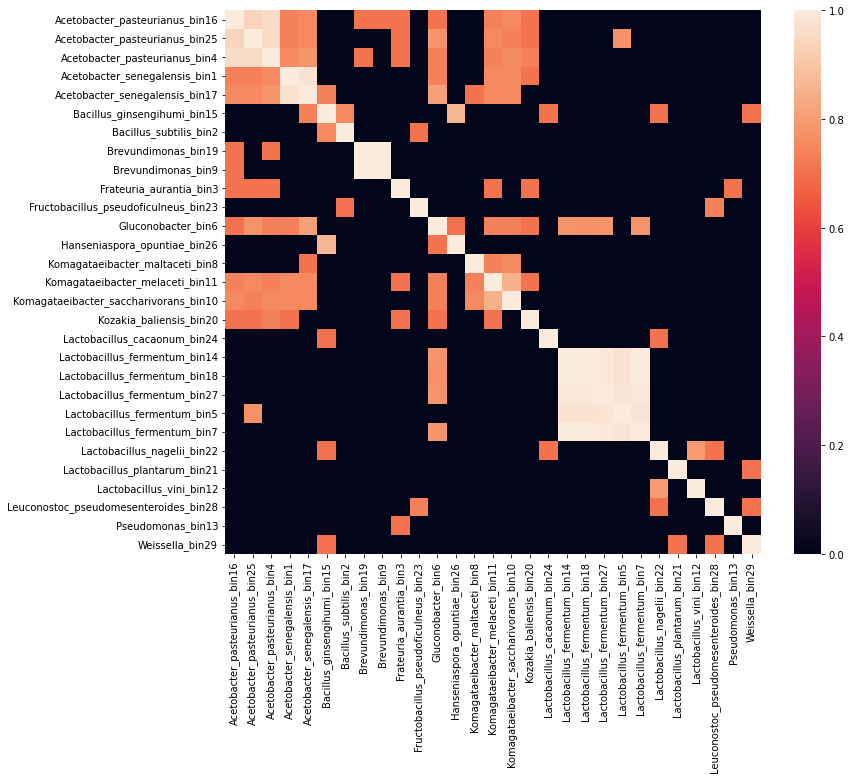

In [3]:
plt.figure(figsize=(12,10))
sns.heatmap(mash_heatmap)

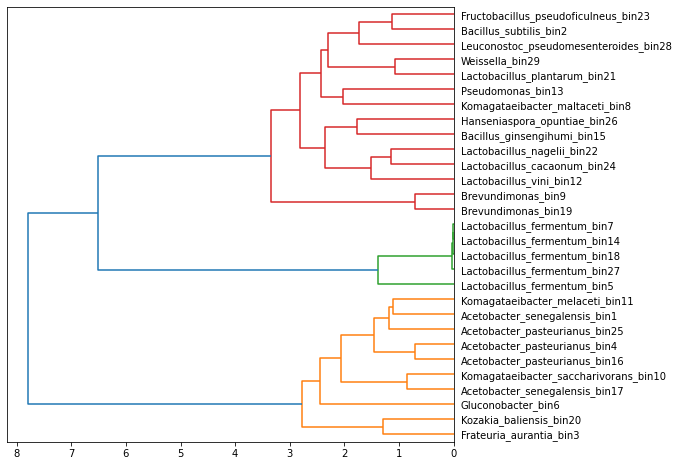

In [13]:
mash_clusters = linkage(mash_heatmap, method="ward")
plt.figure(figsize=(8, 8))
dendrogram(mash_clusters, labels=mash_heatmap.index, leaf_rotation=0, orientation="left")
plt.show()

# OMH

In [5]:
omh_dist_df = pd.read_csv("../distances/mags-omh-k5-l2-m1000.dist", sep=" ", header=None)
omh_heatmap = pd.pivot_table(omh_dist_df,index=0,columns=1,values=2)
omh_heatmap.columns.name = None
omh_heatmap.index.name = None
omh_heatmap

,Acetobacter_pasteurianus_bin16,Acetobacter_pasteurianus_bin25,Acetobacter_pasteurianus_bin4,Acetobacter_senegalensis_bin1,Acetobacter_senegalensis_bin17,Bacillus_ginsengihumi_bin15,Bacillus_subtilis_bin2,Brevundimonas_bin19,Brevundimonas_bin9,Frateuria_aurantia_bin3,...,Lactobacillus_fermentum_bin18,Lactobacillus_fermentum_bin27,Lactobacillus_fermentum_bin5,Lactobacillus_fermentum_bin7,Lactobacillus_nagelii_bin22,Lactobacillus_plantarum_bin21,Lactobacillus_vini_bin12,Leuconostoc_pseudomesenteroides_bin28,Pseudomonas_bin13,Weissella_bin29
Acetobacter_pasteurianus_bin16,1.000,0.714,0.306,0.280,0.257,0.070,0.150,0.127,0.136,0.276,...,0.289,0.286,0.308,0.286,0.133,0.190,0.154,0.164,0.109,0.140
Acetobacter_pasteurianus_bin25,0.714,1.000,0.251,0.219,0.203,0.067,0.143,0.105,0.111,0.240,...,0.278,0.272,0.290,0.274,0.148,0.189,0.176,0.202,0.087,0.144
Acetobacter_pasteurianus_bin4,0.306,0.251,1.000,0.578,0.570,0.118,0.290,0.176,0.178,0.166,...,0.219,0.217,0.210,0.218,0.187,0.282,0.190,0.183,0.193,0.225
Acetobacter_senegalensis_bin1,0.280,0.219,0.578,1.000,0.906,0.101,0.274,0.267,0.273,0.201,...,0.236,0.231,0.221,0.232,0.130,0.248,0.134,0.134,0.262,0.178
Acetobacter_senegalensis_bin17,0.257,0.203,0.570,0.906,1.000,0.094,0.275,0.265,0.271,0.192,...,0.222,0.220,0.209,0.220,0.130,0.245,0.132,0.129,0.268,0.177
Bacillus_ginsengihumi_bin15,0.070,0.067,0.118,0.101,0.094,1.000,0.316,0.043,0.046,0.042,...,0.097,0.098,0.085,0.093,0.252,0.271,0.217,0.163,0.054,0.367
Bacillus_subtilis_bin2,0.150,0.143,0.290,0.274,0.275,0.316,1.000,0.114,0.115,0.105,...,0.175,0.170,0.162,0.171,0.247,0.377,0.251,0.219,0.128,0.324
Brevundimonas_bin19,0.127,0.105,0.176,0.267,0.265,0.043,0.114,1.000,0.946,0.197,...,0.114,0.120,0.113,0.123,0.041,0.114,0.040,0.041,0.434,0.065
Brevundimonas_bin9,0.136,0.111,0.178,0.273,0.271,0.046,0.115,0.946,1.000,0.195,...,0.118,0.122,0.118,0.126,0.044,0.114,0.043,0.044,0.427,0.065
Frateuria_aurantia_bin3,0.276,0.240,0.166,0.201,0.192,0.042,0.105,0.197,0.195,1.000,...,0.221,0.224,0.232,0.224,0.071,0.127,0.083,0.077,0.127,0.072


<AxesSubplot:>

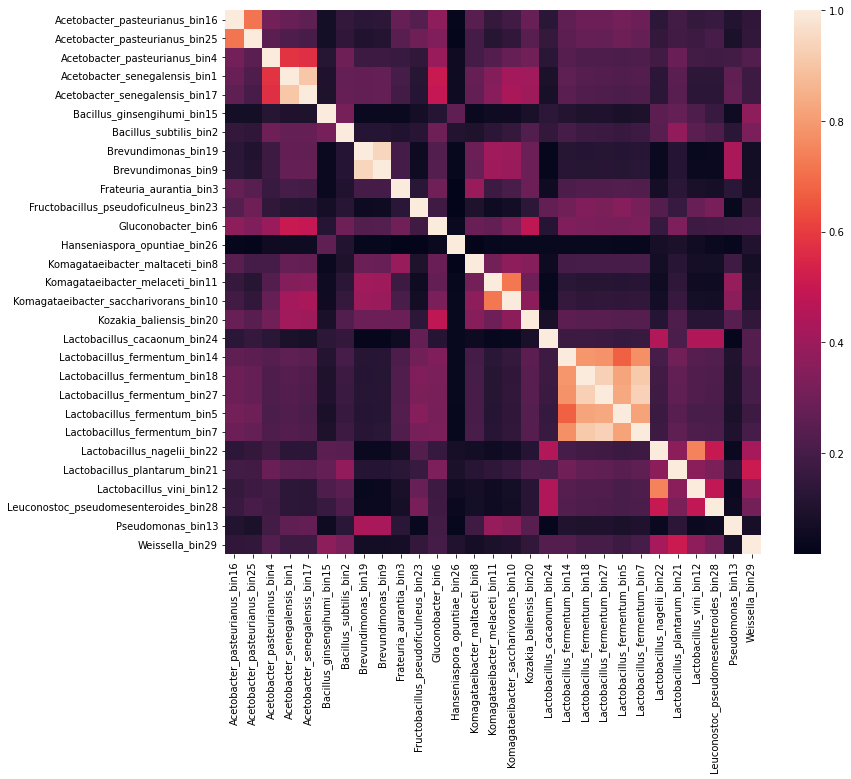

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(omh_heatmap)

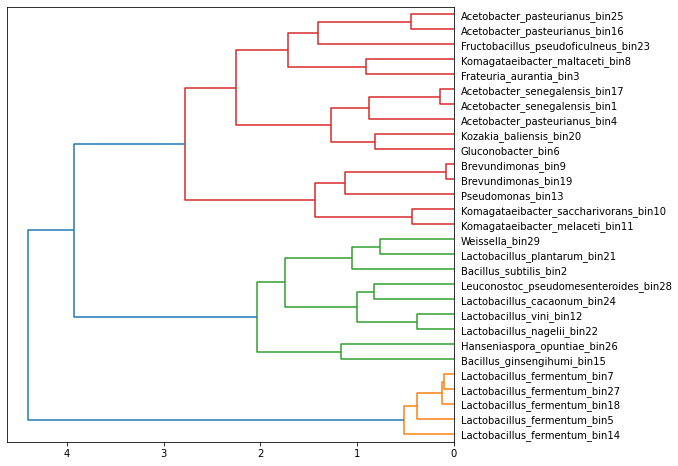

In [12]:
omh_clusters = linkage(omh_heatmap, method="ward")
plt.figure(figsize=(8, 8))
dendrogram(omh_clusters, labels=omh_heatmap.index, leaf_rotation=0, orientation="left")
plt.show()